In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Devemos procurar o tipo de conteúdo que mais
engaja no Instagram, nessa pequena base de dados,
e passar uma prescrição para os criadores de conteúdo.

Também devemos partir do conceito de que engajamento é o indicador fornecido pelas métricas principais da rede social.

In [53]:
df = pd.read_excel("/content/Analisando o engajamento no Instagram.xlsx")
df

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437
5,Foto,2021-09-17,5359,62,NaN,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,NaN,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,NaN,Produtos,N,S,NaN,6379
8,Foto,2021-09-27,6355,89,NaN,Produtos,S,N,S,6444
9,Vídeo,2021-09-28,4056,81,73174.0,Produtos,N,N,NaN,4137


In [54]:
df.isnull().sum() # para ver a quantidade de valores nulos temos em cada feature(variável, coluna) | Nota-se que Carrossel com 44 e Visualizações com 37
                  # são as variáveis com mais valores nulos!

df.shape # Percebemos que é uma base de dados com 52 linhas e 10 colunas

(52, 10)

Devo ***pensar no melhor tratamento para Visualizações*** que é uma coluna estritamente com características do tipo de mídia (vídeo no caso)

Devo também pensar qual será o melhor tratamento para a coluna Carrossel

Deixaremos isso para depois!

In [55]:
df.duplicated().sum() # Não há nenhuma linha duplicada
df.info() # Não precisamos de nenhum tratamento de Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tipo           52 non-null     object        
 1   Data           52 non-null     datetime64[ns]
 2   Curtidas       52 non-null     int64         
 3   Comentários    52 non-null     int64         
 4   Visualizações  15 non-null     float64       
 5   Tags           44 non-null     object        
 6   Pessoas        52 non-null     object        
 7   Campanhas      52 non-null     object        
 8   Carrossel      8 non-null      object        
 9   Interacoes     52 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.2+ KB


Agora vamos buscar entender qual foi o comportamento temporal das colunas

In [56]:
df.columns = [x.strip() for x in df.columns] # Só um ajuste
df.columns

Index(['Tipo', 'Data', 'Curtidas', 'Comentários', 'Visualizações', 'Tags',
       'Pessoas', 'Campanhas', 'Carrossel', 'Interacoes'],
      dtype='object')

In [57]:
fig_interacoes_tempo = px.line(df, x="Data", y="Interacoes", title="Interações ao longo do tempo")
fig_interacoes_tempo.show()

In [58]:
fig_curtidas_tempo = px.line(df, x="Data", y="Curtidas", title="Curtidas ao longo do tempo")
fig_curtidas_tempo.show() # Percebe-se que o gráfico de interações é bem semelhante ao gráfico de curtidas, o que significa que grande parte das interações
                          # Foram de curtidas

In [59]:
fig_comentarios_tempo = px.line(df, x="Data", y="Comentários", title="Comentários ao longo do tempo")
fig_comentarios_tempo.show()

Observa-se essa linha crescente em Dezembro de 2021 nos 3 gráficos, porque foi um mês sem postagem, o que diminuiu a granulidade.

In [60]:
numeric_feats = [col for col in df.columns if df[col].dtype == int]
df[numeric_feats].corr() # Para averiguar a correlações de Interações com as colunas de engajamento

,Curtidas,Comentários,Interacoes
Curtidas,1.000000,0.778160,0.999917
Comentários,0.778160,1.000000,0.786208
Interacoes,0.999917,0.786208,1.000000


Nesse pequeno conjunto de dados, a coluna mais relevante foi a "Curtidas" (O que já haviamos pensando lá em cima)

Nossa métrica de foco é a curtida!

Percebe-se que as curtidas também possuem relação com os comentários

In [61]:
df['Tipo'].value_counts() # Maior parte das postagens compostas por foto
fig2 = px.bar(df['Tipo'].value_counts(), title="Quantidade de postagens por tipo")
fig2.show()

In [62]:
df_analise = df.copy()
dummies1 = pd.get_dummies(df['Tipo']).astype(int)
df_analise = pd.concat([df_analise,dummies1],axis=1)
df_analise[[col for col in df_analise.columns if df_analise[col].dtype == int]].corr()

,Curtidas,Comentários,Interacoes,Foto,IGTV,Reels,Vídeo
Curtidas,1.000000,0.778160,0.999917,0.200027,-0.218976,0.105277,-0.184051
Comentários,0.778160,1.000000,0.786208,0.034755,-0.107860,0.105931,-0.048428
Interacoes,0.999917,0.786208,1.000000,0.197524,-0.217671,0.105762,-0.182086
Foto,0.200027,0.034755,0.197524,1.000000,-0.489246,-0.489246,-0.541736
IGTV,-0.218976,-0.107860,-0.217671,-0.489246,1.000000,-0.106383,-0.117797
Reels,0.105277,0.105931,0.105762,-0.489246,-0.106383,1.000000,-0.117797
Vídeo,-0.184051,-0.048428,-0.182086,-0.541736,-0.117797,-0.117797,1.000000


Percebe-se que, entre os tipos de mídia, as fotos possuem mais chance de se ter um número máximo de curtidas, totalmente diferente quando se trata de vídeos!

In [64]:
df['Carrossel'].fillna("N",inplace=True) # Assumiremos que valores Nan em Carrossel significa que não foi carrossel!


df_videos = df.loc[df['Tipo'] != 'Foto'] # Analisaremos posteriormente separado em outro dataframe para vermos se a coluna Visualizações importa.

df.drop('Visualizações',axis=1,inplace=True)
df.isnull().sum() # Como temos apenas 8 valores nulos na coluna Tags, podemos preenchê-la com a moda

df['Tags'].fillna(df['Tags'].mode()[0],inplace=True)

<ipython-input-64-8544bcf561b6>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Podemos agora descobrir a correlação geral de todas as features com a target (Interacoes)

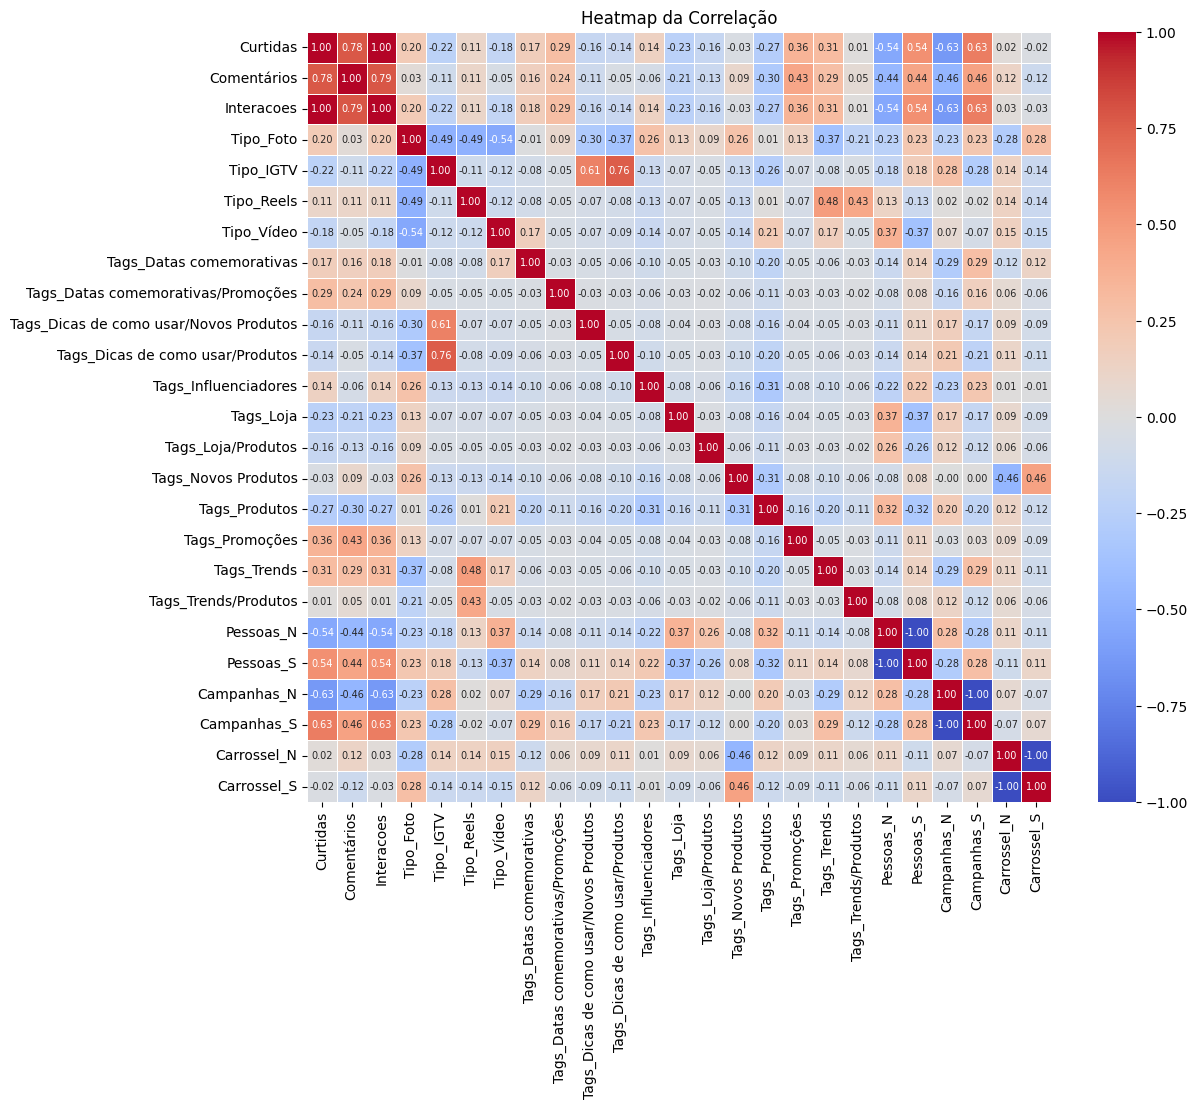

In [66]:
numeric_feats = [col for col in df.columns if df[col].dtype == 'object']
dummies2 = pd.get_dummies(df[numeric_feats]).astype(int)
df_analise2 = pd.concat([df.drop(columns=['Tipo','Tags','Pessoas','Campanhas','Data','Carrossel']),dummies2],axis=1)
correlation_matrix = df_analise2.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 7},fmt=".2f",  # Formato dos valores (duas casas decimais)
    linewidths=0.5,  # Linhas entre as células
    linecolor='white'  # Cor das linhas
)
plt.title('Heatmap da Correlação')
plt.show()

Tipos de postagens como "Foto" estão associados a mais interações e "IGTV" possui uma relação inversa, assim como "Vídeos"

Certos posts como tags de produtos e  tags de loja parecem estar associadas a uma diminuição no engajamento total.

Se houve campanha ou tiveram pessoas na postagem a chance de se obter mais interações é bem maior!

Tags de promoção, de trends e de datas comemorativas também possuem alta correlação.


**Agora iremos analisar o df_videos**

In [71]:
fig3 = px.scatter(x=df_videos["Visualizações"]/10000, y=df_videos["Interacoes"]/10000, title="Visualizações x Interações")
fig3.show() # Parece não houve uma relação linear entre essas duas variáveis (Talvez pela infima quantidade de posts que não são foto)

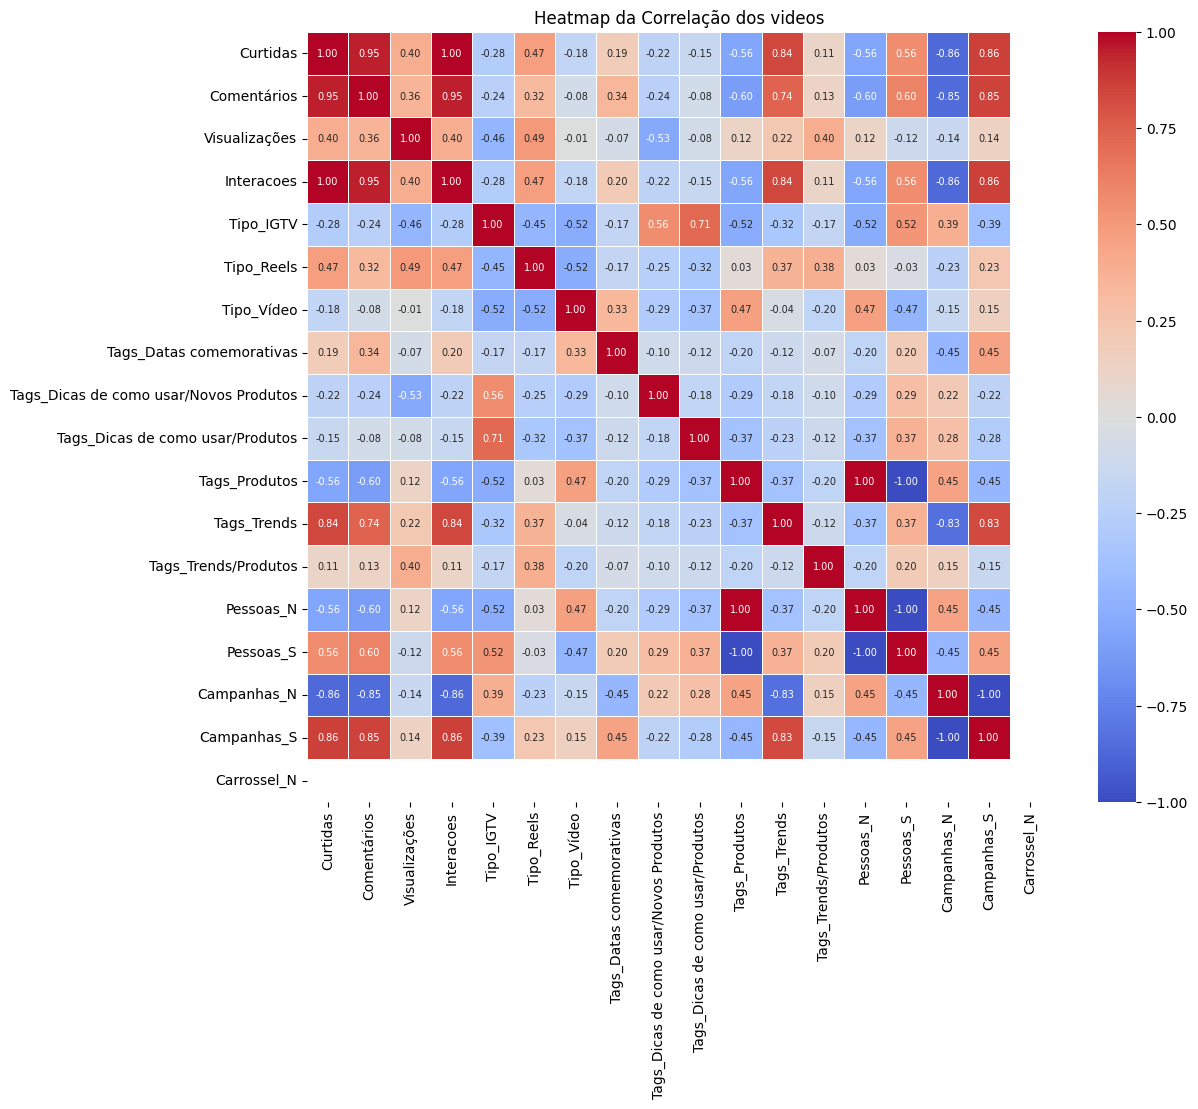

In [76]:
dummies3 = pd.get_dummies(df_videos[numeric_feats]).astype(int)
df_analise_video = pd.concat([df_videos.drop(columns=['Tipo','Tags','Pessoas','Campanhas','Data','Carrossel']),dummies3],axis=1)

correlation_matrix = df_analise_video.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 7},fmt=".2f",  # Formato dos valores (duas casas decimais)
    linewidths=0.5,  # Linhas entre as células
    linecolor='white'  # Cor das linhas
)
plt.title('Heatmap da Correlação dos videos')
plt.show()

In [77]:
df.groupby("Tipo").agg({"Interacoes": "mean"})

,Interacoes
Tipo,
Foto,13534.555556
IGTV,6967.000000
Reels,15117.400000
Vídeo,8308.333333


# Plano Prescritivo para Aumento de Engajamento

##**1. Aumentar Frequência e Diversidade de Conteúdo**
#### **Frequência de Postagens:** Primeiramente, é essencial que a equipe aumente a frequência de postagens. Com mais conteúdos sendo publicados, teremos uma base de dados mais ampla, o que facilitará a análise de desempenho e permitirá ajustes contínuos nas estratégias.

#### **Diversificar Tipos de Mídia:** Atualmente, certos tipos de mídia, como "Foto" e "Reels", mostram uma tendência maior de engajamento. Porém precisamos de mais tipos de midia diversificadas para podermos tirarmos conclusões mais assertivas, pois o tipo "Foto" representa quase 70% da base.

##**2. Foco em Conteúdos com Maior Potencial de Engajamento**
#### **Priorizar tipos (ultimo caso):**O heatmap indica que as fotos e os reels têm correlações positivas com "Interações". Fotos tendem a ser bem aceitos pelo público, então uma parte significativa das postagens deve incluir esses formatos, assim como reels, que nos dias atuais é onde reside o maior tempo de tela das pessoas no Instagram.

#### **Usar IGTV e Vídeos com Moderação:** Estes tipos de mídia apresentam correlações negativas com "Interações", sugerindo que podem gerar menos engajamento. ***A recomendação é usá-los estrategicamente, combinados com outros fatores de engajamento (como influenciadores ou campanhas)***, ou reduzir a frequência de posts com esses formatos caso o objetivo seja maximizar o engajamento.

##**3. Utilizar Tags de Forma Estratégica**
#### **Evitar Tags de Produtos e Tags de Loja em Excesso:** Estas tags estão associadas a uma diminuição no engajamento, indicando que podem parecer excessivamente comerciais. Limitar o uso dessas tags ou usá-las de forma mais criativa pode evitar que o conteúdo seja visto como puramente promocional.

#### **Priorizar Tags de Promoções, Datas Comemorativas e Trends:** Tags que indicam promoções, datas comemorativas e tendências possuem correlação positiva com "Interações". Explorar essas tags de forma consistente pode atrair mais atenção do público e incentivar a interação.

##**4. Aumentar o Uso de Imagens com Pessoas**
#### **Incluir Pessoas nas Postagens**: Imagens que incluem pessoas (clientes, influenciadores ou funcionários) tendem a gerar mais engajamento. O uso de fotos ou vídeos que mostram pessoas cria uma conexão emocional e pode tornar o conteúdo mais acessível e atrativo para o público.

##**5. Incentivar Comentários para Potencializar o Engajamento**
#### **Interações entre Curtidas e Comentários:** A correlação positiva entre "Curtidas", "Comentários" e "Interações" sugere que incentivar os seguidores a comentar (por exemplo, fazendo perguntas nas legendas ou pedindo opiniões) pode aumentar o engajamento total. Utilizar uma CTA para comentários ajudam a criar um ciclo positivo de interações.

##**6. Investimento em Ads**
#### **Continuar com os investimentos em anúncios:** Os posts que foram impulsionados tiveram mais interações. Considerar utilizar estratégias com o objetivo de campanha como "Engajamento" podem trazer resultados satisfatórios.
